# Temperature Forecast Project using ML
#### Problem Statement:
#### Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


#### Attribute Information:

#### For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

#### Please note that there are two target variables here: 

##### 1) Next_Tmax: Next day maximum temperature

##### 2) Next_Tmin: Next day  minimum temperature



#### Note: Use the link below to download the dataset. 

#### Downlaod Files:
https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import ARDRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Loading the Dataset


In [117]:

df = pd.read_csv("D:/temperature.csv")
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

### Shape of the dataset

#### The dataset appears to have a total of 7752 records and 25 columns including 2 target column

In [3]:
df.shape

(7752, 25)

In [7]:
# list of column names

df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# Preporcessing


### We have 24 float64 type features  and  1 object type feature. The target variables "Next_Tmax" and "Next_Tmin"  ate also float64 type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


#### Lets plot a heatmap to identify if any null values

#### We have a lots of missing values in all the features that also includes both the target columns
#### The only features that have no missing values are  "lat",  "lon",  "DEM",  "Slope" and  "Solar radiation"

In [9]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

#### We can observe same as above in pictorial format

<AxesSubplot:>

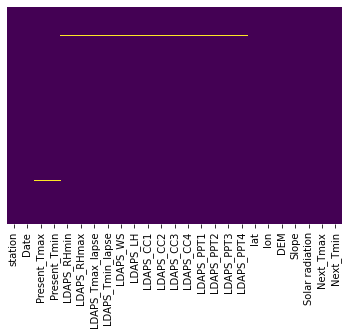

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

## Observe the individual columns

### Since we have 27 missing values in target columns "Next_Tmax" and "Next_Tmin"  out of a total 7750 records, we will drop the entire row correspondent to these column missing values


In [118]:
df.dropna(axis=0, how='any', subset=['Next_Tmax', 'Next_Tmin'], inplace=True)

#### Now we have 7725 records as 27 rows are dropped as mentioned earlier.

In [12]:
df.shape

(7725, 25)

#### We can see from below the null values no longer exist in target columns

In [13]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        60
Present_Tmin        60
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax            0
Next_Tmin            0
dtype: int64

### RTreating the Nan values

#### Since all these features are continous data I have filled missing values with the "mean" value

In [119]:
# filling these continous values using mean

df["Present_Tmax"] = df["Present_Tmax"].fillna(df["Present_Tmax"].mean())
df["Present_Tmin"] = df["Present_Tmin"].fillna(df["Present_Tmin"].mean())
df["LDAPS_RHmin"] = df["LDAPS_RHmin"].fillna(df["LDAPS_RHmin"].mean())
df["LDAPS_RHmax"] = df["LDAPS_RHmax"].fillna(df["LDAPS_RHmax"].mean())
df["LDAPS_Tmax_lapse"] = df["LDAPS_Tmax_lapse"].fillna(df["LDAPS_Tmax_lapse"].mean())
df["LDAPS_Tmin_lapse"] = df["LDAPS_Tmin_lapse"].fillna(df["LDAPS_Tmin_lapse"].mean())
df["LDAPS_WS"] = df["LDAPS_WS"].fillna(df["LDAPS_WS"].mean())
df["LDAPS_LH"] = df["LDAPS_LH"].fillna(df["LDAPS_LH"].mean())
df["LDAPS_CC1"] = df["LDAPS_CC1"].fillna(df["LDAPS_CC1"].mean())
df["LDAPS_CC2"] = df["LDAPS_CC2"].fillna(df["LDAPS_CC2"].mean())
df["LDAPS_CC3"] = df["LDAPS_CC3"].fillna(df["LDAPS_CC3"].mean())
df["LDAPS_CC4"] = df["LDAPS_CC4"].fillna(df["LDAPS_CC4"].mean())
df["LDAPS_PPT1"] = df["LDAPS_PPT1"].fillna(df["LDAPS_PPT1"].mean())
df["LDAPS_PPT2"] = df["LDAPS_PPT2"].fillna(df["LDAPS_PPT2"].mean())
df["LDAPS_PPT3"] = df["LDAPS_PPT3"].fillna(df["LDAPS_PPT3"].mean())
df["LDAPS_PPT4"] = df["LDAPS_PPT4"].fillna(df["LDAPS_PPT4"].mean())

#### I have deliberately avoided features "station" and "Date" as "station" is an entity out of 25 such locations and filling the misisng value may have altered the results. "Date" is given on a daily basis and temperature is consistent, hence filling date value would alter the results.

#### These columns would also be dropped as I got better output without using these features

In [15]:
df.isnull().sum()

station             2
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

# Let's now observe the stats of the dataset

### All the values are accounted for and has no missing values

#### Difference between mean and std also seems fine . However we will check for skewness if any in the further steps

In [16]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7723.000000   7725.000000   7725.000000  7725.000000  7725.000000   
mean     13.008157     29.769563     23.224631    56.741402    88.369140   
std       7.214034      2.959205      2.405561    14.583630     7.164028   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.045017    84.291199   
50%      13.000000     29.900000     23.400000    55.266701    89.699196   
75%      19.000000     32.000000     24.900000    66.996681    93.704353   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7725.000000       7725.000000  7725.000000  7725.000000   
mean          29.616253         23.511807     7.096739    62.468599   
std            2.932271          2.333987     2.171835    33.556339   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.696185         22.114277     5.686496    37.452979   
50%           29.664030         23.733589     6.564141    57.299645   
75%           31.687106         25.135301     7.996899    83.897461   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7725.000000  ...  7725.000000  7725.000000  7725.000000  7725.000000   
mean      0.368482  ...     0.484298     0.277121     0.269440    37.544755   
std       0.261052  ...     1.752597     1.152456     1.199982     0.050386   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.148229  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.319678  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.571547  ...     0.024035     0.009649     0.000703    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7725.000000  7725.000000  7725.000000      7725.000000  7725.000000   
mean    126.991370    61.926856     1.258725      5342.066031    30.274887   
std       0.079347    54.331701     1.371331       429.235277     3.128010   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5437.534180    30.500000   
75%     127.042000    59.832400     1.767800      5728.624512    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7725.000000  
mean     22.932220  
std       2.487613  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

In [17]:
len(df["Next_Tmax"])

7725

In [18]:
len(df["Next_Tmin"])

7725

#### Let's split the "Date" column into "Month" and "Year" as temperature's seem to vary as per these data

In [120]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Using pandas profiling for a quick analysis

In [124]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="My Data Profile Report")

In [126]:
# run this line if you are not able to see the report on Jupyter notebook, download the HTML and view it in separte window

profile.to_file("korea_temp_report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [125]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/41 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# Lets plot a couple of plots for further understanding

#### From the below plot we can observe that the dataset consiste of information from the years 2013 to 2017 and we have "July" and "August" months data more than the other months recorded data

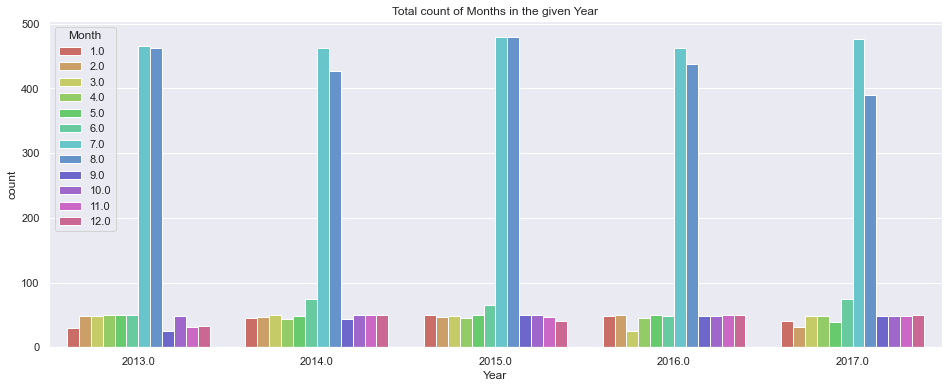

In [75]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Year", data=df, palette="hls", hue="Month").set(title='Total count of Months in the given Year')

#### Let's observe if there is any relationship between the present day temperature and solar radiation.

#### LDAPS (Lightweight Directory Access Protocol) is probably under Government jurisdiction of South Korea and we can see from the below graph Solar radiation plays an important role in creating fluctuations in present temperature.

#### From the plot we can Also see that there is rise in solar radiation and is highest for the year 2017 followed by 2016

#### We can see temperatures have usually been around 25 C to 36 C when solar radiation is high and temparatures are low between 17 C to 25 C approximately 


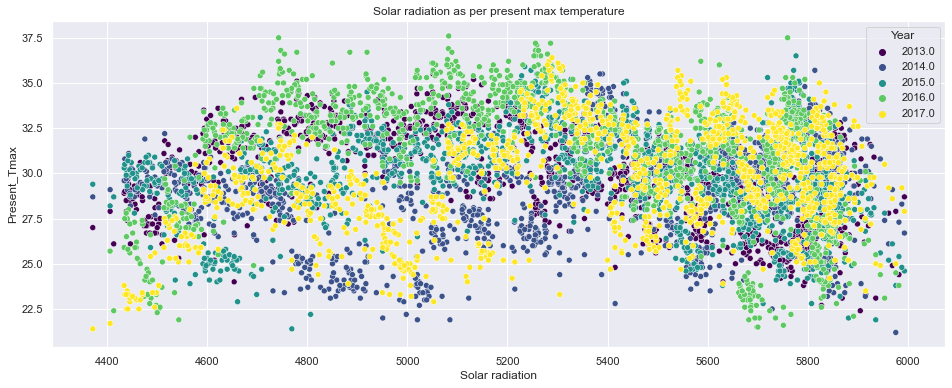

In [78]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df, x="Solar radiation", y="Present_Tmax", 
                hue="Year", palette="viridis").set(title='Solar radiation as per present max temperature')
plt.show()


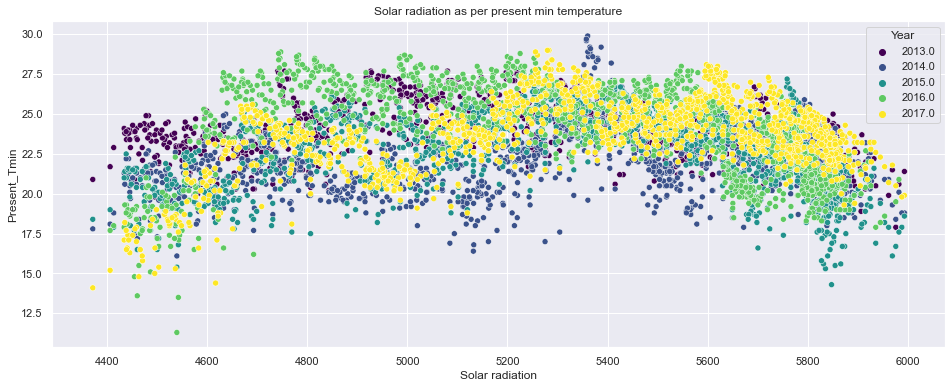

In [79]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df, x="Solar radiation", y="Present_Tmin", 
                hue="Year", palette="viridis").set(title='Solar radiation as per present min temperature')
plt.show()


### Let's observe the geographic location of South Korea.

#### We know any organization, plants or a funded group is setup near the aavialability of resources rather than in some random remote locations.
#### We can see that such Temperature plants are located near to Sea / Coastal side areas with proper transport connectivities.

#### It appears cities like Inchon, Seoul, Wabu, Yangpyong and Pubai have such geographic conditions for which these plants are suitable to be setup.

#### I have used Plotly's  "density_mapbox" graph by making use of available latitudes and longitudes, by coinciding with the country's geo location itself

##### Kindly use the available toggle buttons for customized view if required.

In [23]:
import plotly.express as px
import pandas as pd

fig = px.density_mapbox(df, lat='lat', lon='lon', radius=30, opacity=0.4, height=650,
                        zoom=6.1, center=dict(lat=35.9078, lon=127.7669),
                        mapbox_style="stamen-toner")
fig.show()

#### We can see from the below plot that at current geolocation, there seems to be more of DEM ( elevation) compared to Slope

#### The solar radiation is also somewhere between 4500 to 4800 which although is high, appears to be less compared to other metrics of solar radiation

#### The climate of South Korea has and is changing drastically and the South Korean government has taken steps to reduce greenhouse gas emissions and is one step closer to having a low-carbon based socio-economic nation.

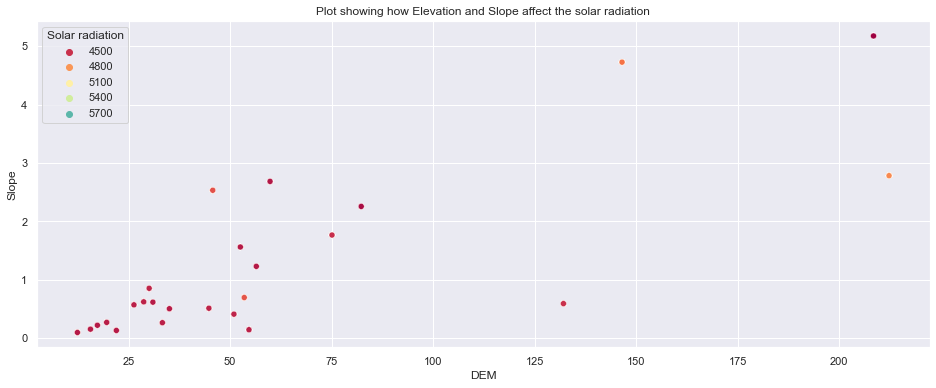

In [92]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df, x="DEM", y="Slope", 
                hue="Solar radiation", palette="Spectral").set(title='Plot showing how Elevation and Slope affect the solar radiation')
plt.show()


#### Let's observe if there is any relationship between the approximate / relative minimum humidity and present temperature

#### We can see that when the temperature is to it's minimum level, humidity is not necessarity minimum and is evenly scattered

#### But we can also see that after 17.5 C and upto 28 C humidity has been somewhat consistent.

#### But the dataset appears to record more details for the year 2017. We can say that power plants dealing with natural resources as such need a lot of sophisticated technology to record every single data point and it could either be a situaton when South Korea had major geolocgical changes in 2017 which seemed to have increased gradually over the period of years steadily.

#### When the temperature was high the humidty was also very high especially in the year 2015 and 2017

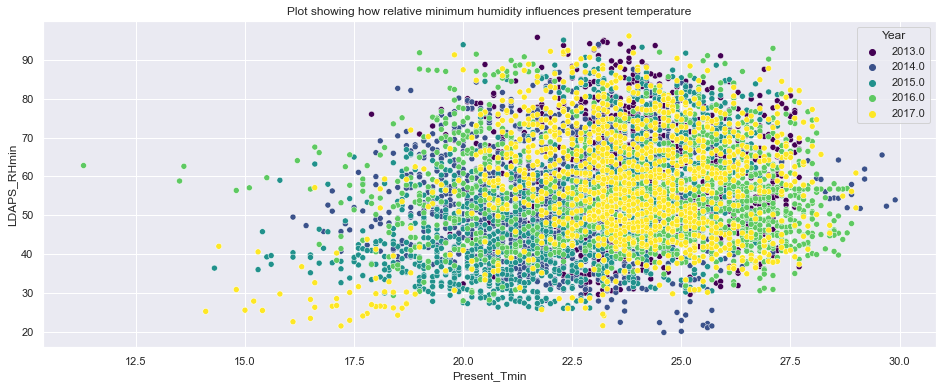

In [80]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df, x="Present_Tmin", y="LDAPS_RHmin", 
                hue="Year", palette="viridis").set(title='Plot showing how relative minimum humidity influences present temperature')
plt.show()


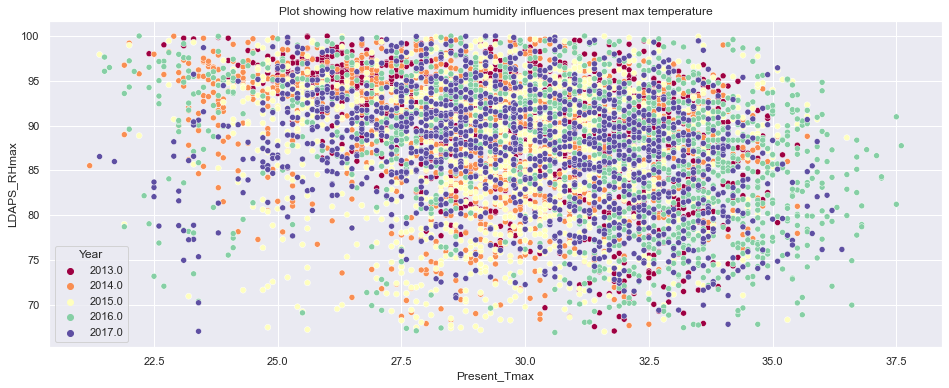

In [82]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df, x="Present_Tmax", y="LDAPS_RHmax", 
                hue="Year", palette="Spectral").set(title='Plot showing how relative maximum humidity influences present max temperature')
plt.show()


#### From the below plot we can see that "June" and "August" seem to have both relative minimum and maximum humidity

#### If you observe both the graphs below there is no much difference when it comes to humidty and it seems consistent across the months

#### I have used "relplot" for the same

#### Humidity is high as "July" and "August" is summer season in South Korea and also coatal areas are generally humid and this could be the reasons for increase or decrease in temperature and humidity

<Figure size 1152x432 with 0 Axes>

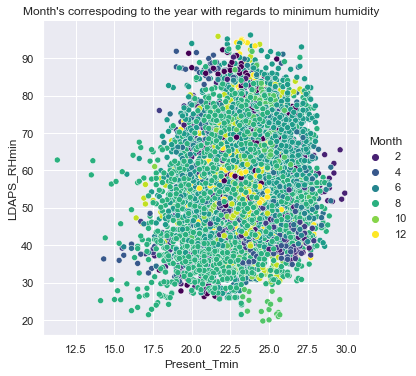

In [81]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.relplot(data=df, x="Present_Tmin", y="LDAPS_RHmin", 
            hue="Month", palette="viridis").set(title="Month's correspoding to the year with regards to minimum humidity")
plt.show()


<Figure size 1152x432 with 0 Axes>

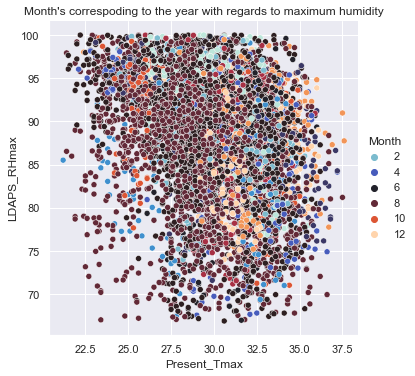

In [83]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.relplot(data=df, x="Present_Tmax", y="LDAPS_RHmax", 
            hue="Month", palette="icefire").set(title="Month's correspoding to the year with regards to maximum humidity")
plt.show()


#### From the below 4 relplots, we can see that Solar radiation is high consistently in the month of July and then in the month of August

#### We know at present, South Korea is having a semi Rainy and Summer season, especially in the areas / cities shown in the previous plots

#### The average cloud cover split seems to be same across all the 6 hour shift and the highest solar radiation is recorded at about 6000 but the number of months are very less in this range. This could mean it's not constant and weather doesn't seem to help much in this case.

#### Since it's a Meteorogical department, there could be seismic or digging activities contributing to this radiation. 



<Figure size 1152x432 with 0 Axes>

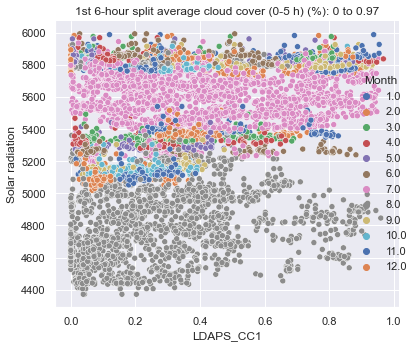

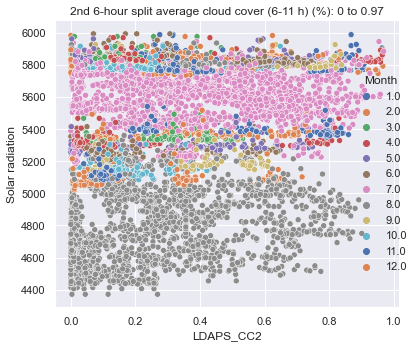

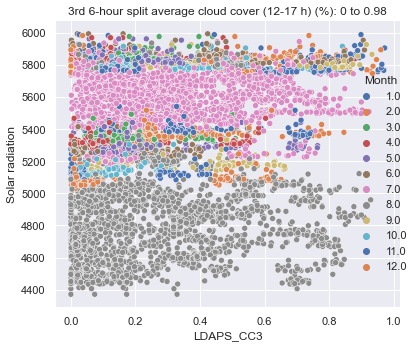

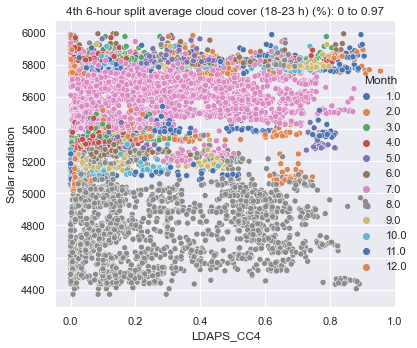

In [112]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")

sns.relplot(data=df, x="LDAPS_CC1", y="Solar radiation", 
            hue="Month", palette="deep").set(title="1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97")

sns.relplot(data=df, x="LDAPS_CC2", y="Solar radiation", 
            hue="Month", palette="deep").set(title="2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97")

sns.relplot(data=df, x="LDAPS_CC3", y="Solar radiation", 
            hue="Month", palette="deep").set(title="3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98")

sns.relplot(data=df, x="LDAPS_CC4", y="Solar radiation", 
            hue="Month", palette="deep").set(title="4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97")
plt.show()

#### As mentioned in the beginning we have dropped "station" and "Date" column

In [30]:
df.drop(columns=["station","Date"], inplace=True)

In [31]:
df.shape

(7725, 25)

# Distribution of all the columns in the dataset


### All the features seem to normally distributed. Since we have multiple features, lets try to identify the distribution

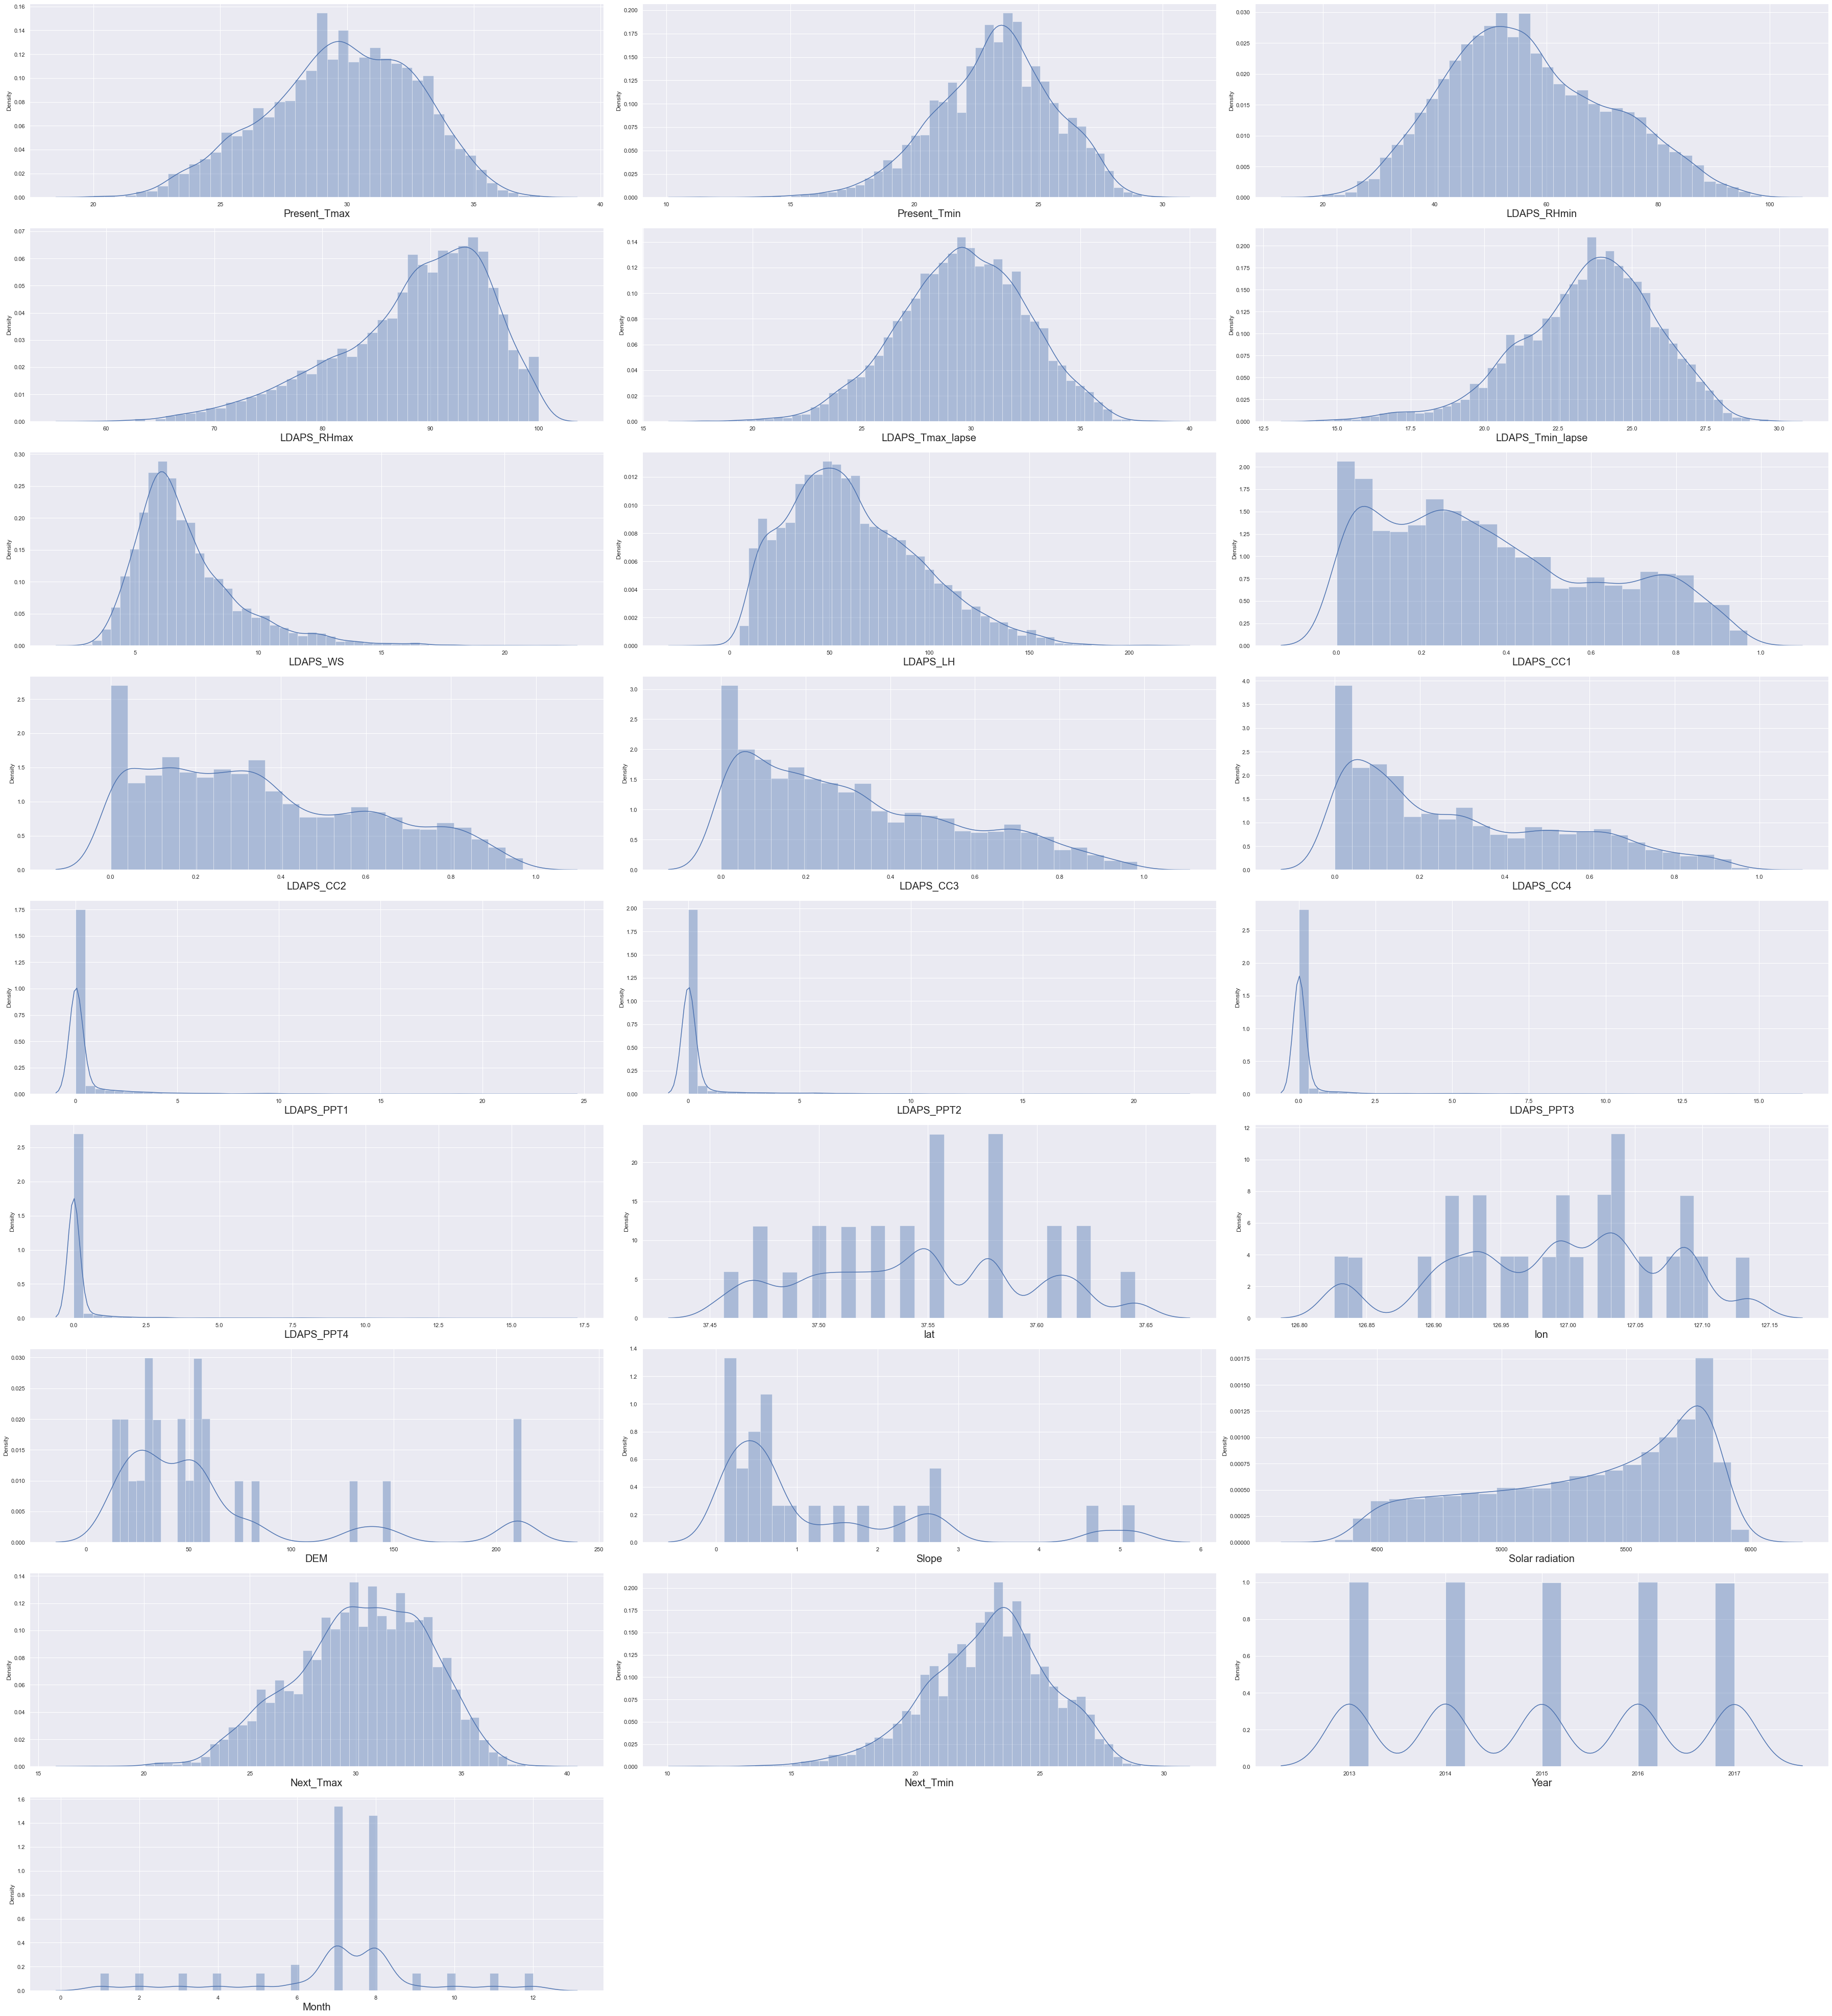

In [32]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(50,55), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=25:
        ax = plt.subplot(9,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [33]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month'],
      dtype='object')

# Applying Z-score to identify and remove outliers

### I have considered columns 'Present_Tmax', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope'  and 'Solar radiation' as these have more skewness.


In [34]:
from scipy.stats import zscore

z_score = zscore(df[['Present_Tmax', 'LDAPS_RHmin', 'LDAPS_RHmax',
                       'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
                       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
                       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
                       'Solar radiation']])

abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
count   6904.000000   6904.000000  6904.000000  6904.000000       6904.000000   
mean      29.921561     23.276438    55.521012    88.070946         29.870628   
std        2.869120      2.360943    13.832299     6.929590          2.744167   
min       21.200000     11.300000    19.794666    66.897522         21.195428   
25%       28.100000     21.700000    45.618697    83.894827         28.008429   
50%       30.000000     23.400000    54.262054    89.170044         29.884542   
75%       32.100000     24.900000    64.928831    93.397106         31.797716   
max       37.600000     29.900000    96.169815    99.999008         38.542255   

       LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH    LDAPS_CC1    LDAPS_CC2  \
count       6904.000000  6904.000000  6904.000000  6904.000000  6904.000000   
mean          23.624036     6.865369    62.024188     0.344580     0.330522   
std            2.245041     1.837649    33.224624     0.250441     0.239371   
min           16.517926     2.882580    -8.569043     0.000000     0.000000   
25%           22.198063     5.628352    36.722658     0.137191     0.133668   
50%           23.820666     6.461910    57.287139     0.297788     0.297264   
75%           25.187678     7.730666    84.222469     0.499452     0.509339   
max           29.619342    13.589191   161.661149     0.967277     0.968353   

       ...   LDAPS_PPT4          lat          lon          DEM        Slope  \
count  ...  6904.000000  6904.000000  6904.000000  6904.000000  6904.000000   
mean   ...     0.088528    37.544032   126.990929    61.300961     1.242805   
std    ...     0.361911     0.050126     0.079541    53.672753     1.354583   
min    ...     0.000000    37.456200   126.826000    12.370000     0.098500   
25%    ...     0.000000    37.510200   126.937000    28.700000     0.271300   
50%    ...     0.000000    37.550700   126.995000    45.716000     0.618000   
75%    ...     0.000000    37.577600   127.042000    59.832400     1.767800   
max    ...     3.789353    37.645000   127.135000   212.335000     5.178200   

       Solar radiation    Next_Tmax    Next_Tmin         Year        Month  
count      6904.000000  6904.000000  6904.000000  6904.000000  6904.000000  
mean       5339.273003    30.547262    23.049942  2014.995510     7.089948  
std         422.418907     2.946644     2.409667     1.399119     2.242283  
min        4371.684570    20.800000    13.300000  2013.000000     1.000000  
25%        5014.173828    28.600000    21.500000  2014.000000     7.000000  
50%        5428.586426    30.700000    23.200000  2015.000000     7.000000  
75%        5717.971558    32.700000    24.700000  2016.000000     8.000000  
max        5992.895996    38.900000    29.800000  2017.000000    12.000000  

[8 rows x 25 columns]

### Percentage of Data Loss

#### In this case we are losing about 10.62 % of data after applying z-score and by dropping these data I have recieved better accuracy.

#### Ideally it's not a good choice to drop such huge amout of data but in this case by not dropping the outliers, the model did not give better results, hence these outlier data was removed completely

In [35]:
# Percentage data loss:

loss_percent = (7725-6904)/7725*100
print(loss_percent)

10.627831715210355


## Correlation of the features with the dependent variable "Next_Tmax" and  "Next_Tmin"

In [36]:

corr_matrix = df.corr()
corr_matrix[["Next_Tmax", "Next_Tmin"]]

Next_Tmax  Next_Tmin
Present_Tmax       0.589422   0.618314
Present_Tmin       0.454487   0.791869
LDAPS_RHmin       -0.420328   0.145484
LDAPS_RHmax       -0.294704  -0.085369
LDAPS_Tmax_lapse   0.808703   0.551174
LDAPS_Tmin_lapse   0.544994   0.872281
LDAPS_WS          -0.276988  -0.015534
LDAPS_LH           0.167502  -0.056139
LDAPS_CC1         -0.444295   0.016623
LDAPS_CC2         -0.472727   0.087311
LDAPS_CC3         -0.482144   0.005922
LDAPS_CC4         -0.421009  -0.041453
LDAPS_PPT1        -0.223902  -0.023103
LDAPS_PPT2        -0.200552   0.010444
LDAPS_PPT3        -0.125766   0.027208
LDAPS_PPT4        -0.149026  -0.098500
lat               -0.049081  -0.079274
lon                0.005845  -0.050852
DEM               -0.157636  -0.241504
Slope             -0.088350  -0.141471
Solar radiation   -0.020947   0.091172
Next_Tmax          1.000000   0.587031
Next_Tmin          0.587031   1.000000
Year               0.094485   0.058585
Month             -0.013465  -0.025023

## Lets us now examine correlation using a "heatmap" for further clarification

#### Since there are multiple features, going through this plot may seem difficult. 


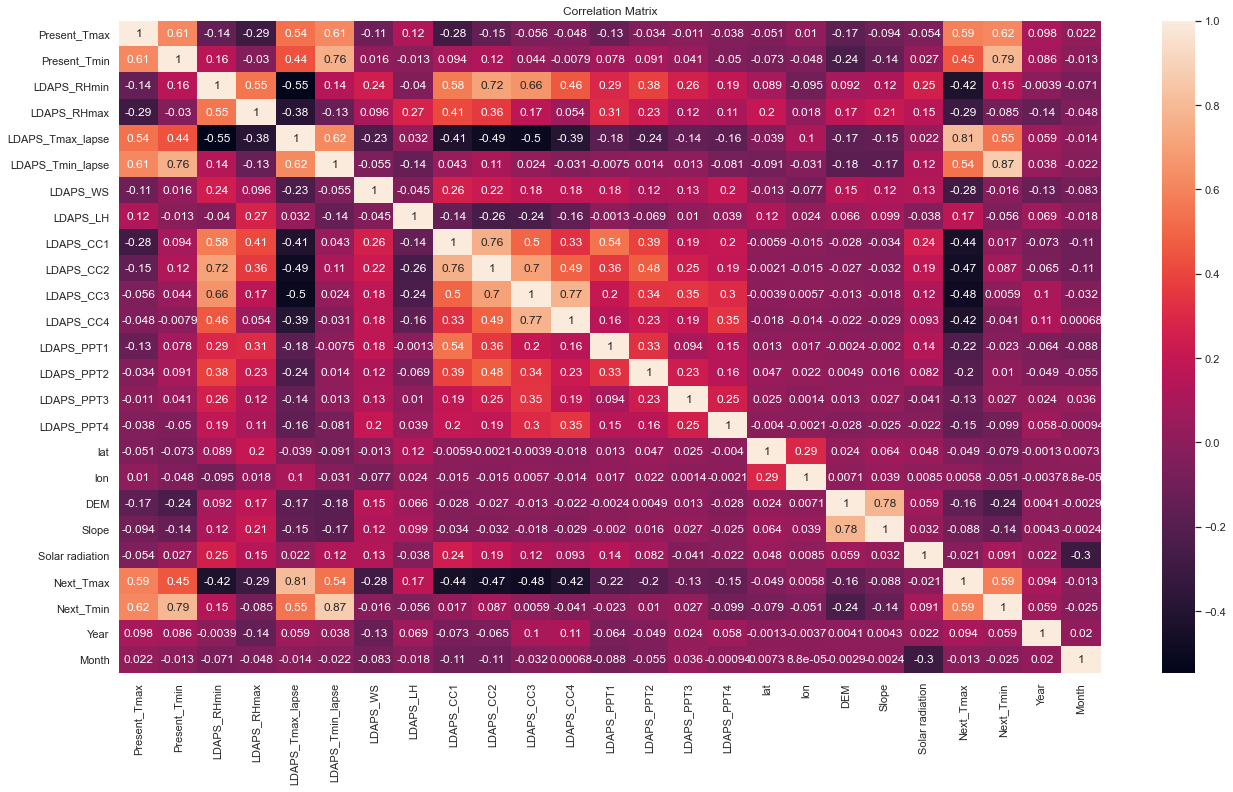

In [37]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting up of dataset between x (features) and y (target column)

#### Since the target values have 2 features of same data type, col "y" is split in the following manner

In [38]:
x = df.drop(columns = ["Next_Tmax", "Next_Tmin"], axis=1)
y = df[["Next_Tmax", "Next_Tmin"]]

# Check for skewness of data post split

### We can see all the values have skewness, even though we have dropped the outliers

### We are not considering "lat", "lon", "Month" and "Year"

In [39]:
x.skew()

Present_Tmax       -0.278724
Present_Tmin       -0.333060
LDAPS_RHmin         0.307051
LDAPS_RHmax        -0.684618
LDAPS_Tmax_lapse   -0.106446
LDAPS_Tmin_lapse   -0.410665
LDAPS_WS            1.085527
LDAPS_LH            0.561378
LDAPS_CC1           0.596271
LDAPS_CC2           0.506058
LDAPS_CC3           0.701620
LDAPS_CC4           0.710085
LDAPS_PPT1          3.742993
LDAPS_PPT2          4.855280
LDAPS_PPT3          5.516516
LDAPS_PPT4          5.906318
lat                 0.102755
lon                -0.278256
DEM                 1.755616
Slope               1.588262
Solar radiation    -0.506093
Year                0.007356
Month              -0.684306
dtype: float64

# Storing the list of features having skewness in a variable "feat_skew". It's would be easier to pass it through at one go


In [41]:
feat_skew = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
               'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
               'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
               'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
               'Solar radiation']

# Lets us now Scale the data for further processing.¶

#### we have used StandardScaler for further scaling up of data 

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.42579235, -0.79484082,  0.19771653, ...,  1.54744573,
        -1.42636481, -0.48612358],
       [ 0.68961297, -0.71012279, -0.23552485, ...,  1.25486307,
        -1.42636481, -0.48612358],
       [ 0.58504372,  0.0099805 , -0.49384609, ...,  1.24123382,
        -1.42636481, -0.48612358],
       ...,
       [-2.30803884, -2.61627855, -2.08076657, ..., -2.12117383,
         1.43278381,  0.40588896],
       [-2.30803884, -2.36212445, -2.27602489, ..., -2.13287025,
         1.43278381,  0.40588896],
       [-2.34289526, -2.4892015 , -2.35610561, ..., -2.10215993,
         1.43278381,  0.40588896]])

# Power Transformer (yeo-Johnson)

#### To reduce the skewness to some extent, I have used a Power Transformer technique
#### Since we have both positive and negative values in skewness, I have used "Yeo-Johnson" technique

## The data is further standardized

In [43]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method="yeo-johnson")

x[feat_skew] = scaler.fit_transform(x[feat_skew].values) 

x[feat_skew]

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0        -0.473778     -0.827105     0.261547     0.351620         -0.666609   
1         0.670455     -0.748201    -0.170814     0.264025         -0.025317   
2         0.557621     -0.045452    -0.441370    -0.720625          0.062704   
3         0.708324     -0.002320     0.260432     1.383668         -0.078615   
4         0.483040     -0.628359     0.114184     0.188513         -0.293121   
...            ...           ...          ...          ...               ...   
7745     -2.164616     -2.113033    -2.628259    -1.371661         -0.759663   
7746     -2.322572     -2.240337    -2.061009    -0.756942         -1.150221   
7747     -2.110975     -2.333790    -2.405861    -1.309970         -1.273305   
7748     -2.110975     -2.145148    -2.700525    -1.466154         -1.043207   
7749     -2.137858     -2.240337    -2.826385    -1.471046         -0.714561   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0            -0.347306  0.169382  0.345994  -0.311019  -0.430088  -0.469294   
1             0.117419 -0.585150 -0.174407  -0.352357  -0.195801  -0.482573   
2             0.369251 -0.261516 -1.390056  -0.433145  -0.168968  -0.230572   
3            -0.206243 -0.617422  0.241129  -0.397755  -0.319898  -0.472468   
4            -0.134312 -0.552260  1.302920  -0.741309  -0.204210  -0.369958   
...                ...       ...       ...        ...        ...        ...   
7745         -2.102135  0.040162 -2.023667  -1.342961  -1.439480  -1.610637   
7746         -2.251380 -0.527274  0.684537  -1.253560  -1.477354  -1.610632   
7747         -1.952158 -0.254196  0.417781  -1.499066  -1.114338  -1.610637   
7748         -1.965765  0.002793 -0.327741  -1.458548  -1.151725  -1.610637   
7749         -2.033047  0.430800 -2.060675  -1.369431  -1.246287  -1.610637   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM  \
0     -0.521295   -0.537257   -0.496479   -0.474461   -0.428984  1.850383   
1     -0.541458   -0.537257   -0.496479   -0.474461   -0.428984  0.063695   
2     -0.451998   -0.537257   -0.496479   -0.474461   -0.428984 -0.359284   
3     -0.500546   -0.537257   -0.496479   -0.474461   -0.428984  0.092755   
4     -0.287337   -0.537257   -0.496479   -0.474461   -0.428984 -0.284709   
...         ...         ...         ...         ...         ...       ...   
7745  -1.459346   -0.537257   -0.496479   -0.474461   -0.428984 -0.718470   
7746  -1.345301   -0.537257   -0.496479   -0.474461   -0.428984 -1.004784   
7747  -1.497838   -0.537257   -0.496479   -0.474461   -0.428984 -1.580888   
7748  -1.497838   -0.537257   -0.496479   -0.474461   -0.428984 -1.402126   
7749  -1.490807   -0.537257   -0.496479   -0.474461   -0.428984 -1.193172   

         Slope  Solar radiation  
0     1.325729         1.883896  
1    -0.379530         1.430775  
2    -0.947710         1.410514  
3     1.246922         1.387408  
4    -0.396037         1.396467  
...        ...              ...  
7745 -0.273016        -1.760487  
7746 -1.357015        -1.778395  
7747 -1.281951        -1.776503  
7748 -1.072567        -1.782682  
7749 -0.933471        -1.766403  

[6904 rows x 19 columns]

# Check the skewness of the feature dataset
#### The skewness seems to have reduced considerably if not fully

In [44]:
x.skew()

Present_Tmax       -0.032482
Present_Tmin       -0.016196
LDAPS_RHmin        -0.013708
LDAPS_RHmax        -0.098921
LDAPS_Tmax_lapse   -0.010740
LDAPS_Tmin_lapse   -0.026176
LDAPS_WS            0.006013
LDAPS_LH           -0.031129
LDAPS_CC1           0.063066
LDAPS_CC2           0.047678
LDAPS_CC3           0.090323
LDAPS_CC4           0.137699
LDAPS_PPT1          1.550708
LDAPS_PPT2          1.744196
LDAPS_PPT3          1.905510
LDAPS_PPT4          2.150483
lat                 0.102755
lon                -0.278256
DEM                 0.038605
Slope               0.233011
Solar radiation    -0.167600
Year                0.007356
Month              -0.684306
dtype: float64

# Distribution after skewness is removed to some extent

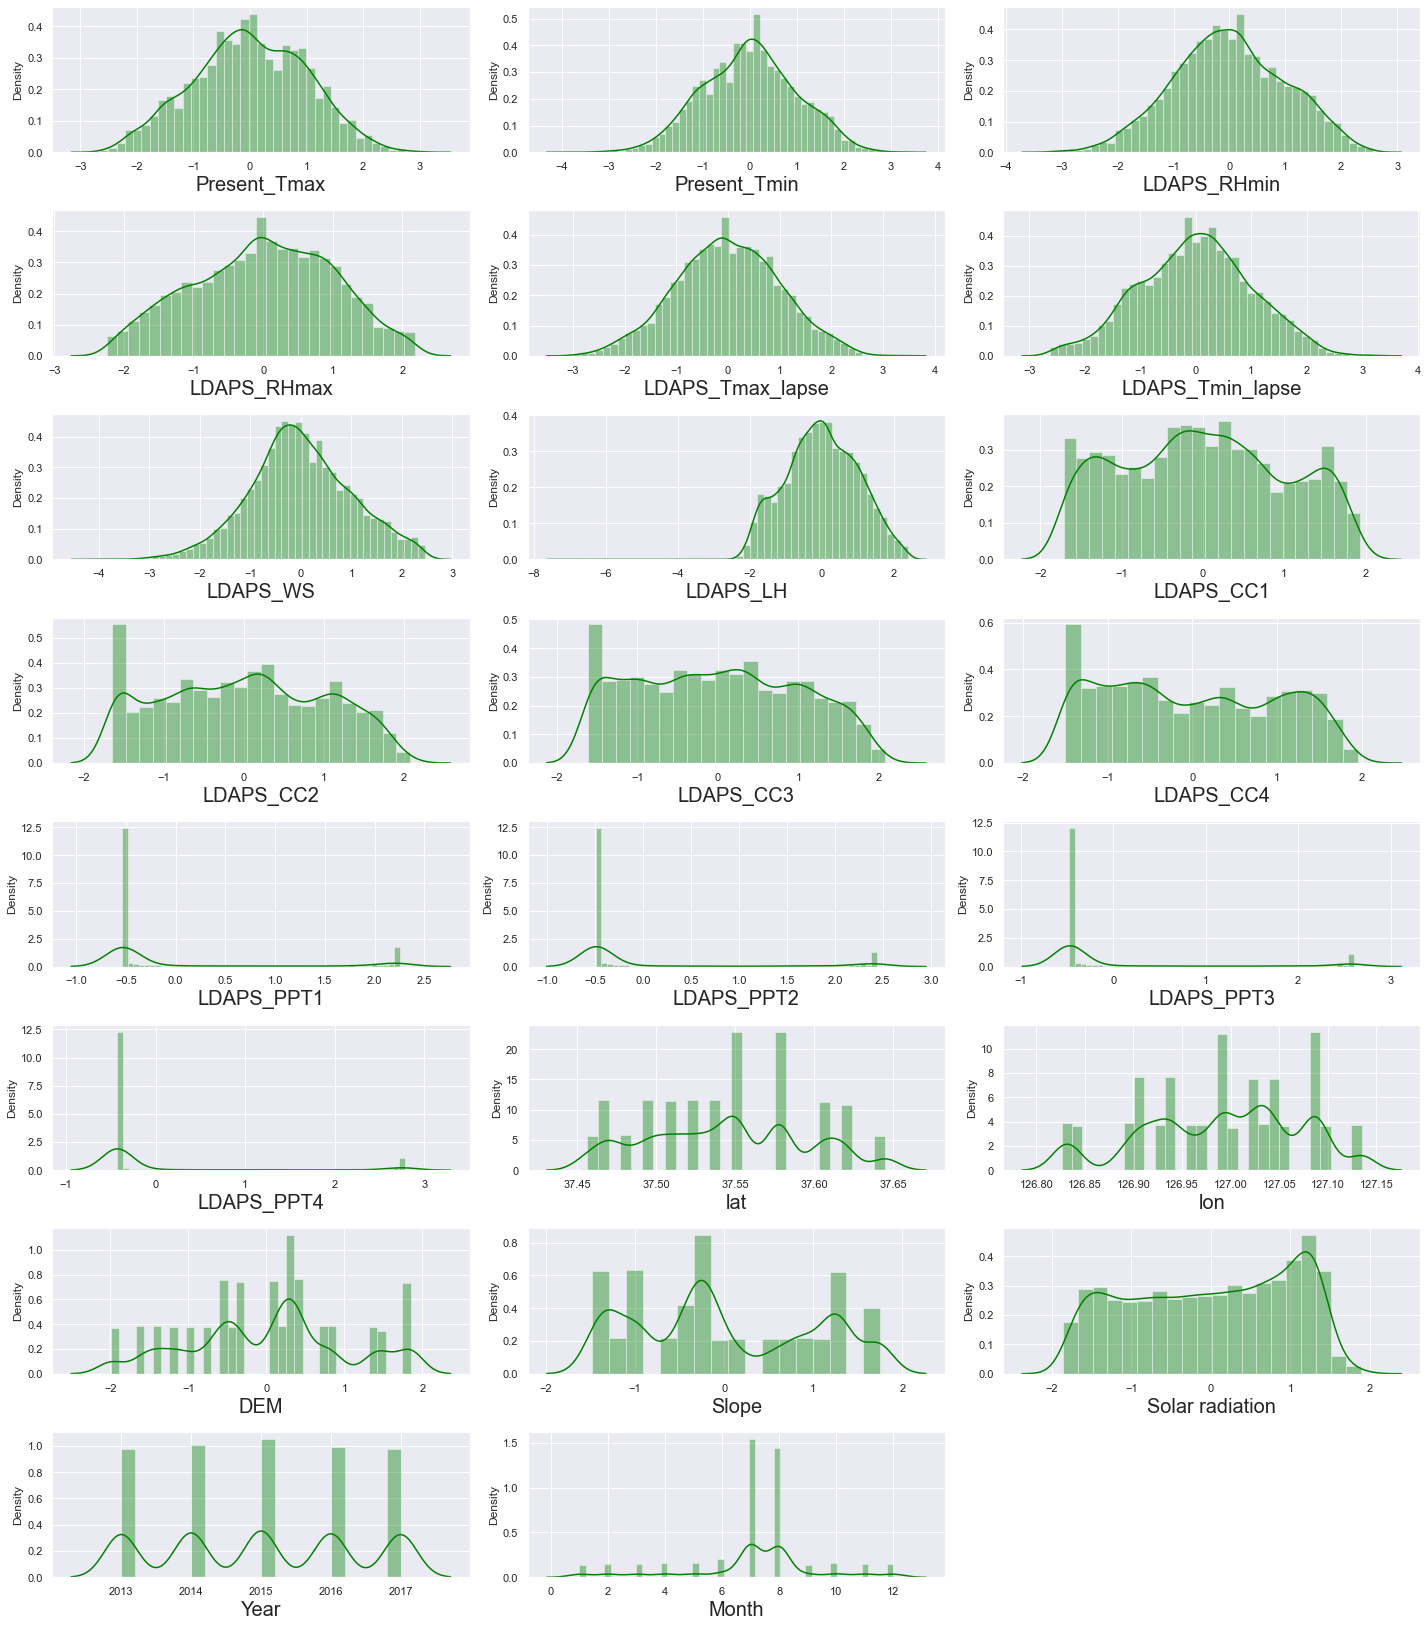

In [45]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in x:
    if plotnumber <=25:
        ax = plt.subplot(9,3, plotnumber)
        sns.distplot(x[column], color="green")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Finding variance inflation factor in each scaled column
### This gives us relationship between feature vs feature and we can drop if necessary to avoid multicolinearity

### We can see columns "LDAPS_Tmin_lapse"  and  "LDAPS_Tmax_lapse" have a high multicollinearity

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

vif          Features
0   2.680478      Present_Tmax
1   3.089464      Present_Tmin
2   5.897446       LDAPS_RHmin
3   2.264759       LDAPS_RHmax
4   6.918601  LDAPS_Tmax_lapse
5   6.964233  LDAPS_Tmin_lapse
6   1.243175          LDAPS_WS
7   1.537009          LDAPS_LH
8   3.509706         LDAPS_CC1
9   4.743336         LDAPS_CC2
10  4.973296         LDAPS_CC3
11  2.733242         LDAPS_CC4
12  1.552349        LDAPS_PPT1
13  1.422845        LDAPS_PPT2
14  1.262337        LDAPS_PPT3
15  1.276863        LDAPS_PPT4
16  1.182878               lat
17  1.169968               lon
18  2.843147               DEM
19  2.799373             Slope
20  1.345956   Solar radiation
21  1.140061              Year
22  1.129258             Month

### Both the features  "LDAPS_Tmin_lapse"  and  "LDAPS_Tmax_lapse" are dropped as by dropping both VIF was considerably reduced compared to only one feature.

In [47]:
x.drop(['LDAPS_Tmin_lapse', 'LDAPS_Tmax_lapse'], axis = 1, inplace=True)

# Variance inflation factor after the removal of fetaures

### VIF is somewhat reduced than before if not fully removed

In [48]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif


vif         Features
0   2.375780     Present_Tmax
1   2.253761     Present_Tmin
2   3.446756      LDAPS_RHmin
3   2.449475      LDAPS_RHmax
4   1.172671         LDAPS_WS
5   1.400450         LDAPS_LH
6   4.117566        LDAPS_CC1
7   5.026442        LDAPS_CC2
8   4.532660        LDAPS_CC3
9   2.795547        LDAPS_CC4
10  2.203203       LDAPS_PPT1
11  1.967070       LDAPS_PPT2
12  1.682369       LDAPS_PPT3
13  1.626297       LDAPS_PPT4
14  1.212852              lat
15  1.203810              lon
16  2.812503              DEM
17  2.655685            Slope
18  1.235856  Solar radiation
19  1.120807             Year
20  1.121335            Month

# split the dataset into train and test data set

#### I have chosed 200 random state and 30% of data is divided in text dataset

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)

# Create multi output classification models
#### I have considered 4 ML models in this scenario

### 1) DecisionTreeRegressor 

In [50]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  1.005694980694979
Mean Squared Error (MSE):  2.124493243243246
Root Mean Squared Error (RMSE):  1.457564147213853


### 2) RandomForestRegressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.982943367107951
Mean Absolute Error (MAE):  0.6712579633204632
Mean Squared Error (MSE):  0.8812780726351345
Root Mean Squared Error (RMSE):  0.9387641198060003


### 3) KNeighborsRegressor

In [52]:
from sklearn.neighbors import KNeighborsRegressor

k_neigh = KNeighborsRegressor()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print("Adjusted R2 squared : ",k_neigh.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.8903653379139832
Mean Absolute Error (MAE):  0.7926158301158286
Mean Squared Error (MSE):  1.1679164092664105
Root Mean Squared Error (RMSE):  1.0807018132983819


### 4) ExtraTreesRegressor

In [53]:
from sklearn.ensemble import ExtraTreesRegressor

ext_reg = ExtraTreesRegressor()
ext_reg.fit(x_train,y_train)

y_pred = ext_reg.predict(x_test)

print("Adjusted R2 squared : ",ext_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  0.5661732625482625
Mean Squared Error (MSE):  0.6309991283783785
Root Mean Squared Error (RMSE):  0.7943545356944709


# Cross validation to check if its overfitting

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
scr = cross_val_score(dt_reg, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: 0.17836966823440226


In [56]:
scr = cross_val_score(rf_reg, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

Cross Validation score of RandomForestRegressor model is: 0.5380642848838927


In [57]:
scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

Cross Validation score of KNeighborsRegressor model is: 0.25164636151796


In [58]:
scr = cross_val_score(ext_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

Cross Validation score of ExtraTreesRegressor model is: 0.5602978750129


# Selecting the best ML model for this dataset

### From the above algorithms RandomForestRegressor is an appropriate model for this dataset.

### Compared to other algorithms, RandomForestRegressor has the least difference between accuracy and cross validation

### These 4 algorithms are known to support multiout regression unlike the other models

| Sr.No | ML Models used | Adjusted R2 Score | Cross Validation Scores | Difference in values |
| --- | --- | --- | --- |---|
| 1 | DecisionTreeRegressor | 100 | 0.178369668234402 | 99.8216303317656 |
| 2 | RandomForestRegressor | 0.982943367107951 | 0.538064284883892 | 0.444879082224059 |
| 3 | KNeighborsRegressor | 0.890365337913983 | 0.25164636151796 | 0.638718976396023 |
| 4 | ExtraTreesRegressor | 100 | 0.5602978750129 | 99.4397021249871 |


## Use "MultiOutputRegressor"

### This strategy consists of fitting one regressor per target. This is a simple strategy for extending regressors that do not natively support multi-target regression.

In [59]:
from sklearn.multioutput import MultiOutputRegressor

In [60]:
multiregressor = MultiOutputRegressor(rf_reg)

In [61]:
multiregressor.fit(x_train,y_train)

MultiOutputRegressor(estimator=RandomForestRegressor())

In [62]:
multiregressor.score(x_train,y_train)

0.9830193988540337

# Hyper Parameter Tuning

### Let us try to tune the proposed model (RandomForestRegressor) to get better accuracy, if possible

##### The "paramaters" have been selected from the skicit library and I have considered 4 paramaters

In [65]:
parameters = {"criterion":["mse", "mae"],
              "max_features":["auto", "sqrt", "log2"],
              "oob_score":[True, False],
              "random_state":[30, 50, 70, 100, 120]
              }

### RandomizedSearchCV is used to tune the parameters by fitting the same to the training dataset

#### We have used this as the dataset was large to process in GridSearchCV and have used upto 10 iterations before getting best params

In [67]:
from sklearn.model_selection import RandomizedSearchCV
RCV = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=5, n_iter=10)

In [68]:
RCV.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'oob_score': [True, False],
                                        'random_state': [30, 50, 70, 100, 120]})

In [69]:
RCV.best_params_

{'random_state': 30,
 'oob_score': False,
 'max_features': 'sqrt',
 'criterion': 'mse'}

### Rebuild the model using the appropriate params we recieved from best_params_


#### Its observed that there is no improvement in model accuracy and it still stands at 98.32 % better

In [70]:
mod_final = MultiOutputRegressor(RandomForestRegressor(random_state = 30, oob_score =True, max_features= "sqrt", criterion= "mse"))

mod_final.fit(x_train,y_train)
pred = mod_final.predict(x_test)

In [71]:
mod_final.score(x_train,y_train)

0.9832558746144471

# Saving the model (using joblib)

In [113]:
import joblib
 
joblib.dump(mod_final,"Korea_Temperature_Prediction.pkl")

['Korea_Temperature_Prediction.pkl']

# Loading the saved model

In [114]:
model = joblib.load("Korea_Temperature_Prediction.pkl")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction

0       1
0     28.799  20.266
1     34.858  26.762
2     32.565  22.224
3     30.755  21.773
4     27.510  20.208
...      ...     ...
2067  33.511  26.403
2068  33.169  23.275
2069  32.907  25.442
2070  26.805  18.094
2071  29.911  23.205

[2072 rows x 2 columns]